In [1]:
import numpy as np
import pickle
np.random.seed(7)  # for reproducibility


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


Using TensorFlow backend.


In [3]:
import keras
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

In [4]:
import matplotlib.pyplot as plt
import os
import numpy

In [5]:
def unpickle(file):
    with open(file,'rb') as fo:
        dict=pickle.load(fo, encoding='bytes')
    data=dict['data']
    data = data.reshape((-1, 32, 32, 3))
    labels=dict['label']
    return data, labels

In [6]:
def saveTest(your_predict_labels):
    f=open('testlabel.pickle','rb')
    labels=pickle.load(f)
    f.close()
  #here you must replace the labels that you have predicted for the test set:
    for i in range(len(labels)):
        labels[i]=your_predict_labels[i]
  #save the pickle file that you should upload:
    f=open('testlabel.pickle','wb')
    pickle.dump(labels,f)
    f.close()

In [7]:
X_train_label, Y_train_label =unpickle("trainset.pickle")
print(X_train_label.shape)

(9000, 32, 32, 3)


In [8]:
X_validation_label, Y_validation_label=unpickle("validset.pickle")

In [9]:
f=open('testset.pickle','rb')
dict=pickle.load(f)
f.close()
X_test_label=dict['data']
X_test_label = X_test_label.reshape((-1, 32, 32, 3))
X_test = X_test_label.astype('float32')

print(X_test_label.shape)

(3000, 32, 32, 3)


In [10]:
f=open('testlabel.pickle','rb')
Y_test_label=pickle.load(f)
f.close()
Y_test=np_utils.to_categorical(Y_test_label, 10)


In [11]:
X_train = X_train_label.astype('float32')
X_validation = X_validation_label.astype('float32')


Y_train = np_utils.to_categorical(Y_train_label, 10)
Y_validation = np_utils.to_categorical(Y_validation_label, 10)
print(X_train.shape)

(9000, 32, 32, 3)


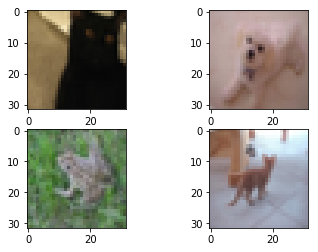

In [12]:
#image visualization
for i in range(4):
    img=X_train_label[i]
    img=img.reshape(-1,32,32).transpose([1,2,0])
    plt.subplot(2,2,i+1)
    plt.imshow(img)


In [13]:
# Parameter
num_classes = Y_train.shape[1]
batch_size = 64
epochs = 100
no_estimators = 5

In [14]:
# create CNN 6 conv layer & 2 Maxpooling layer
def create_cnn_model():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu', border_mode='same'))
    model.add(BatchNormalization())    
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
    
    model.add(BatchNormalization())
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))

    model.add(BatchNormalization())
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    
    '''
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    '''
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
    return model

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Kera

Instructions for updating:
Use tf.cast instead.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 8s - loss: 1.4053 - acc: 0.4972 - val_loss: 1.1943 - val_acc: 0.5333
Epoch 2/100
 - 3s - loss: 1.1573 - acc: 0.5649 - val_loss: 1.1136 - val_acc: 0.5657
Epoch 3/100
 - 4s - loss: 1.0504 - acc: 0.6060 - val_loss: 1.6235 - val_acc: 0.4477
Epoch 4/100
 - 3s - loss: 1.0286 - acc: 0.6270 - val_loss: 1.3183 - val_acc: 0.5300
Epoch 5/100
 - 4s - loss: 0.9875 - acc: 0.6458 - val_loss: 0.9409 - val_acc: 0.6337
Epoch 6/100
 - 4s - loss: 0.9432 - acc: 0.6641 - val_loss: 1.1014 - val_acc: 0.6257
Epoch 7/100
 - 4s - loss: 0.9715 - acc: 0.6777 - val_loss: 1.0268 - val_acc: 0.6183
Epoch 8/100
 - 4s - loss: 0.9008 - acc: 0.6921 - val_loss: 1.1022 - val_acc: 0.6243
Epoch 9/100
 - 4s - loss: 0.8657 - acc: 0.7046 - val_loss: 0.9116 - val_acc: 0.6320
Epoch 10/100
 - 4s - loss: 0.7756 - acc: 0.7254 - val_loss: 1.0022 - val_acc: 0.6190
Epoch 11/100
 - 4s - loss: 0.7242 - acc: 0.7407 - val_loss: 0.9444 - val_acc: 0.6447
Epoch 12/100
 - 4s - loss:

Epoch 97/100
 - 3s - loss: 0.0429 - acc: 0.9857 - val_loss: 2.1083 - val_acc: 0.6577
Epoch 98/100
 - 4s - loss: 0.0435 - acc: 0.9854 - val_loss: 1.8281 - val_acc: 0.6740
Epoch 99/100
 - 4s - loss: 0.0479 - acc: 0.9831 - val_loss: 1.7630 - val_acc: 0.6940
Epoch 100/100
 - 4s - loss: 0.0405 - acc: 0.9847 - val_loss: 1.7890 - val_acc: 0.6967
3000/3000 [==============================] - 0s 164us/step

Test Accuracy: 0.7777


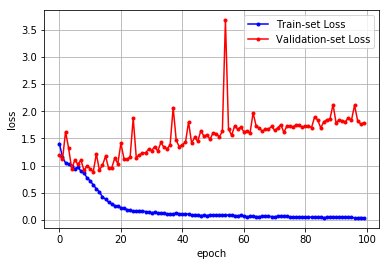

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 6s - loss: 1.3624 - acc: 0.4924 - val_loss: 1.2940 - val_acc: 0.5427
Epoch 2/100
 - 4s - loss: 1.2153 - acc: 0.5503 - val_loss: 1.0096 - val_acc: 0.5700
Epoch 3/100
 - 4s - loss: 1.0716 - acc: 0.6071 - val_loss: 1.1411 - val_acc: 0.5903
Epoch 4/100
 - 4s - loss: 1.0058 - acc: 0.6284 - val_loss: 0.9275 - val_acc: 0.6230
Epoch 5/100
 - 4s - loss: 0.9966 - acc: 0.6416 - val_loss: 0.9053 - val_acc: 0.6360
Epoch 6/100
 - 4s - loss: 0.8886 - acc: 0.6788 - val_loss: 0.9772 - val_acc: 0.6173
Epoch 7/100
 - 4s - loss: 0.8663 - acc: 0.6841 - val_loss: 1.0046 - val_acc: 0.6100
Epoch 8/100
 - 4s - loss: 0.8534 - acc: 0.6872 - val_loss: 0.9718 - val_acc: 0.6090
Epoch 9/100
 - 4s - loss: 0.7763 - acc: 0.6993 - val_loss: 1.0939 - val_acc: 0.6060
Epoch 10/100
 - 4s - loss: 0.6588 - acc: 0.7307 - val_loss: 0.9722 - val_acc: 0.6153
Epoch 11/100
 - 4s - loss: 0.5575 - acc: 0.7700 - val_loss: 1.2045 - val_acc: 0.5927
Epoch 12/100
 - 4s - loss:

Epoch 97/100
 - 4s - loss: 0.0528 - acc: 0.9834 - val_loss: 1.8213 - val_acc: 0.6923
Epoch 98/100
 - 4s - loss: 0.0485 - acc: 0.9838 - val_loss: 2.3274 - val_acc: 0.6490
Epoch 99/100
 - 4s - loss: 0.0399 - acc: 0.9873 - val_loss: 2.2420 - val_acc: 0.6370
Epoch 100/100
 - 4s - loss: 0.0485 - acc: 0.9849 - val_loss: 1.8631 - val_acc: 0.6907
3000/3000 [==============================] - 0s 148us/step

Test Accuracy: 0.7657


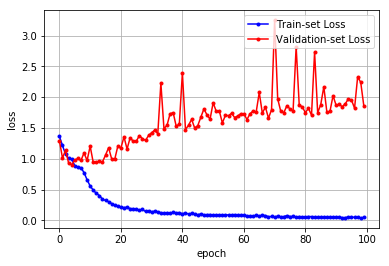

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 6s - loss: 1.3960 - acc: 0.5007 - val_loss: 1.6067 - val_acc: 0.4997
Epoch 2/100
 - 3s - loss: 1.1584 - acc: 0.5621 - val_loss: 1.2673 - val_acc: 0.4963
Epoch 3/100
 - 4s - loss: 1.0425 - acc: 0.5978 - val_loss: 0.9007 - val_acc: 0.5893
Epoch 4/100
 - 4s - loss: 0.9639 - acc: 0.6207 - val_loss: 1.0084 - val_acc: 0.6027
Epoch 5/100
 - 4s - loss: 0.9103 - acc: 0.6577 - val_loss: 1.0254 - val_acc: 0.5997
Epoch 6/100
 - 4s - loss: 0.8118 - acc: 0.6818 - val_loss: 0.9459 - val_acc: 0.6227
Epoch 7/100
 - 4s - loss: 0.7230 - acc: 0.7057 - val_loss: 0.9052 - val_acc: 0.6367
Epoch 8/100
 - 4s - loss: 0.6268 - acc: 0.7376 - val_loss: 0.9030 - val_acc: 0.6577
Epoch 9/100
 - 4s - loss: 0.5426 - acc: 0.7733 - val_loss: 0.9720 - val_acc: 0.6410
Epoch 10/100
 - 4s - loss: 0.5016 - acc: 0.7872 - val_loss: 0.9189 - val_acc: 0.6540
Epoch 11/100
 - 4s - loss: 0.4552 - acc: 0.8151 - val_loss: 0.8934 - val_acc: 0.6593
Epoch 12/100
 - 4s - loss:

Epoch 97/100
 - 4s - loss: 0.0539 - acc: 0.9814 - val_loss: 2.1643 - val_acc: 0.6600
Epoch 98/100
 - 4s - loss: 0.0545 - acc: 0.9814 - val_loss: 2.0253 - val_acc: 0.6790
Epoch 99/100
 - 4s - loss: 0.0446 - acc: 0.9836 - val_loss: 2.0026 - val_acc: 0.6570
Epoch 100/100
 - 4s - loss: 0.0429 - acc: 0.9867 - val_loss: 2.0734 - val_acc: 0.6810
3000/3000 [==============================] - 0s 152us/step

Test Accuracy: 0.7627


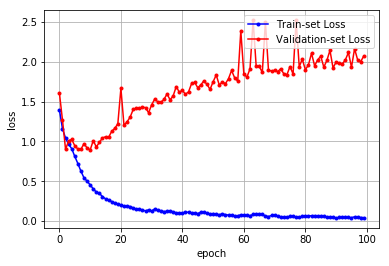

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 5s - loss: 1.3782 - acc: 0.4960 - val_loss: 1.2180 - val_acc: 0.5493
Epoch 2/100
 - 4s - loss: 1.1376 - acc: 0.5590 - val_loss: 1.0476 - val_acc: 0.5527
Epoch 3/100
 - 4s - loss: 1.0402 - acc: 0.6018 - val_loss: 1.0486 - val_acc: 0.5617
Epoch 4/100
 - 4s - loss: 1.0147 - acc: 0.6230 - val_loss: 1.0623 - val_acc: 0.5863
Epoch 5/100
 - 4s - loss: 0.9123 - acc: 0.6510 - val_loss: 1.0373 - val_acc: 0.6113
Epoch 6/100
 - 4s - loss: 0.8989 - acc: 0.6744 - val_loss: 0.9443 - val_acc: 0.6120
Epoch 7/100
 - 4s - loss: 0.7902 - acc: 0.6952 - val_loss: 1.0462 - val_acc: 0.6163
Epoch 8/100
 - 4s - loss: 0.7584 - acc: 0.7121 - val_loss: 0.9412 - val_acc: 0.6390
Epoch 9/100
 - 4s - loss: 0.6509 - acc: 0.7427 - val_loss: 0.9129 - val_acc: 0.6377
Epoch 10/100
 - 4s - loss: 0.5563 - acc: 0.7701 - val_loss: 1.6536 - val_acc: 0.5233
Epoch 11/100
 - 4s - loss: 0.4943 - acc: 0.7927 - val_loss: 0.9449 - val_acc: 0.6547
Epoch 12/100
 - 4s - loss:

Epoch 97/100
 - 4s - loss: 0.0510 - acc: 0.9798 - val_loss: 1.9264 - val_acc: 0.6730
Epoch 98/100
 - 4s - loss: 0.0503 - acc: 0.9831 - val_loss: 1.8779 - val_acc: 0.6737
Epoch 99/100
 - 4s - loss: 0.0529 - acc: 0.9833 - val_loss: 1.9587 - val_acc: 0.6777
Epoch 100/100
 - 4s - loss: 0.0451 - acc: 0.9833 - val_loss: 1.8998 - val_acc: 0.6850
3000/3000 [==============================] - 0s 151us/step

Test Accuracy: 0.7683


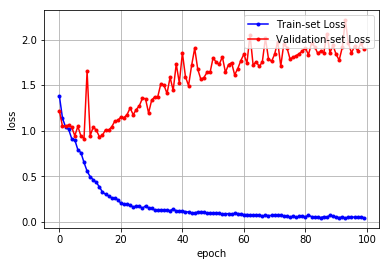

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 6s - loss: 1.3691 - acc: 0.5034 - val_loss: 1.4332 - val_acc: 0.5097
Epoch 2/100
 - 4s - loss: 1.0924 - acc: 0.5726 - val_loss: 1.1564 - val_acc: 0.5653
Epoch 3/100
 - 4s - loss: 0.9430 - acc: 0.6168 - val_loss: 1.0149 - val_acc: 0.5983
Epoch 4/100
 - 4s - loss: 0.8862 - acc: 0.6436 - val_loss: 1.2809 - val_acc: 0.5727
Epoch 5/100
 - 4s - loss: 0.8159 - acc: 0.6639 - val_loss: 0.9569 - val_acc: 0.6260
Epoch 6/100
 - 4s - loss: 0.7430 - acc: 0.6917 - val_loss: 0.9465 - val_acc: 0.6193
Epoch 7/100
 - 4s - loss: 0.6536 - acc: 0.7264 - val_loss: 1.1082 - val_acc: 0.6103
Epoch 8/100
 - 4s - loss: 0.6076 - acc: 0.7460 - val_loss: 0.8541 - val_acc: 0.6520
Epoch 9/100
 - 4s - loss: 0.5480 - acc: 0.7722 - val_loss: 0.8647 - val_acc: 0.6443
Epoch 10/100
 - 4s - loss: 0.4989 - acc: 0.7924 - val_loss: 0.9300 - val_acc: 0.6387
Epoch 11/100
 - 4s - loss: 0.4782 - acc: 0.8050 - val_loss: 0.8885 - val_acc: 0.6610
Epoch 12/100
 - 4s - loss:

Epoch 97/100
 - 4s - loss: 0.0439 - acc: 0.9843 - val_loss: 1.9789 - val_acc: 0.6807
Epoch 98/100
 - 4s - loss: 0.0414 - acc: 0.9859 - val_loss: 1.9445 - val_acc: 0.6803
Epoch 99/100
 - 4s - loss: 0.0440 - acc: 0.9847 - val_loss: 1.9529 - val_acc: 0.6793
Epoch 100/100
 - 4s - loss: 0.0444 - acc: 0.9850 - val_loss: 1.9128 - val_acc: 0.6830
3000/3000 [==============================] - 0s 156us/step

Test Accuracy: 0.7583


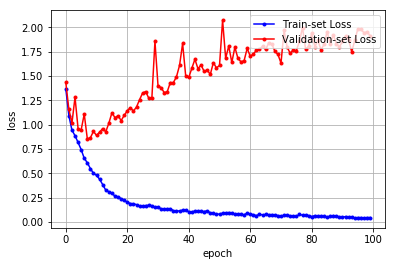

In [15]:
## ENSEMBLE MODELS
# Train many CNN models
for i in np.arange(no_estimators):
    # check point to save best model
    checkpoint = keras.callbacks.ModelCheckpoint('models_9/model_'+str(i)+'.h5', monitor='val_acc', \
            verbose=0, save_best_only=True, save_weights_only=True, mode='auto')
    # clear GPU memory
    model = None
    K.clear_session()
    
    # train model
    model = create_cnn_model()
    history=model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), nb_epoch=100, \
                batch_size=64, verbose=2, callbacks=[checkpoint])
    print("\nTest Accuracy: {:.4f}".format(model.evaluate(X_test, Y_test)[1]))
    y_vloss=history.history['val_loss']
    y_loss=history.history['loss']
    
    x_len=numpy.arange(len(y_loss))
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [17]:
# Check individual scores - val_acc and get list of the best models
score_list = []
score_list2 = []
score_list3=[]
model = create_cnn_model()
for i in np.arange(no_estimators):    
    model.load_weights('models_9/model_'+str(i)+'.h5')
    scores3= model.evaluate(X_test, Y_test, verbose=0)
    scores2= model.evaluate(X_train, Y_train, verbose=0)
    scores = model.evaluate(X_validation, Y_validation, verbose=0)
    score_list.append(scores[1])   #validation Acc
    score_list2.append(scores2[1])    #Train Acc
    score_list3.append(scores3[1])  #Test Acc
score_list = np.array(score_list)
score_list2= np.array(score_list2)
score_list3= np.array(score_list3)
score_list_filter = score_list >= 0.70 # threshold to select best model
print("Train Acc: "+str(score_list2))
print("Validation Acc: "+ str(score_list))
print("Test Acc: "+ str(score_list3))

print(score_list_filter)

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train Acc: [0.99877778 0.99933333 0.99711111 0.99933333 0.99966667]
Validation Acc: [0.69766667 0.708      0.685      0.697      0.7       ]
Test Acc: [0.76       0.766      0.761      0.77633333 0.76466667]
[False  True False False  True]


In [18]:
# Ensemble predictions ~ val_err 16%
predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
predictions_test=np.zeros((Y_test.shape[0],Y_test.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False:
        continue
    #validation
    model.load_weights('models_9/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_validation, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]
    #Test
    prediction_test = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot_test = np_utils.to_categorical(prediction_test, 10)
    predictions_test = predictions_test + prediction_onehot_test*score_list3[i]

predictions_label = np.argmax(predictions, axis=1)
evaluate = np.equal(predictions_label, Y_validation_label)

predictions_label_test = np.argmax(predictions_test, axis=1)
evaluate_test = np.equal(predictions_label_test, Y_test_label)

print("Ensemble Validation_Error: %.2f%%" % (100-np.mean(evaluate)*100))
print("Ensemble Validation_Accuracy: %.2f%%" % (np.mean(evaluate)*100))

print("Ensemble Test_Error: %.2f%%" % (100-np.mean(evaluate_test)*100))
print("Ensemble Test_Accuracy: %.2f%%" % (np.mean(evaluate_test)*100))

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Ensemble Validation_Error: 29.20%
Ensemble Validation_Accuracy: 70.80%
Ensemble Test_Error: 23.40%
Ensemble Test_Accuracy: 76.60%


In [ ]:
## PERFORM PREDICTION ON TEST SET

X_test = X_test_label.astype('float32')

predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False: # skip bad model
        continue
    model.load_weights('models_9/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]

predictions_label = np.argmax(predictions, axis=1)
output = predictions_label.tolist()

with open('testlabel.pickle','wb') as f:
    pickle.dump(output, f)

pred = model.evaluate(X_test, Y_test)
print("test loss: ",pred[0]+"test acc: ",pred[1])